In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import os
os.environ['KERAS_BACKEND'] = "tensorflow"
#TensorFlow: Channels last order.
#Theano: Channels first order.
#CNTK: Channels last order.

In [2]:
import matplotlib
#from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import imageio as im
from keras import models #vamos precisar desta biblioteca para aceder às camadas do modelo
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras import backend as K
#K.set_image_dim_ordering('tf') 
K.image_data_format() == 'channels_last'
from keras.utils import np_utils
from keras.utils.data_utils import get_file
#from keras.datasets import mnist

from tensorflow.keras.datasets import fashion_mnist

Using TensorFlow backend.


(60000, 28, 28)


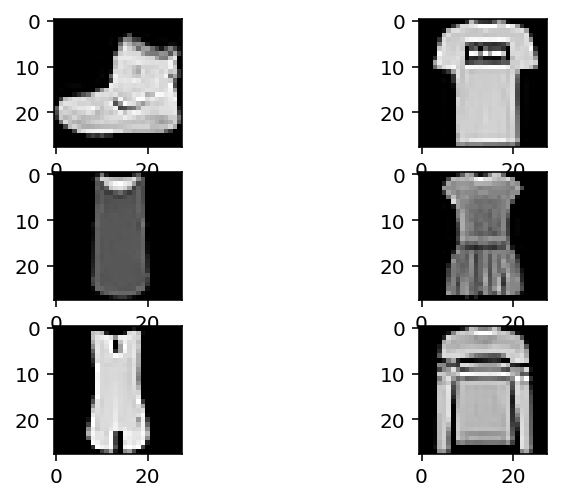

shape[0]:  60000
shape antes:  (60000, 28, 28)
shape depois:  (60000, 28, 28, 1)


In [3]:
# Visualizar 6 imagens do mnist numa escala de cinzentos
def visualize_mnist(X_train):
    #(X_train, y_train), (X_test, y_test) = load_mnist_dataset('mnist.npz')
    plt.subplot(321)
    plt.imshow(X_train[0], cmap='gray')
    plt.subplot(322)
    plt.imshow(X_train[1], cmap='gray')
    plt.subplot(323)
    plt.imshow(X_train[2], cmap='gray')
    plt.subplot(324)
    plt.imshow(X_train[3], cmap='gray')
    plt.subplot(325)
    plt.imshow(X_train[4], cmap='gray')
    plt.subplot(326)
    plt.imshow(X_train[5], cmap='gray')
    plt.show()
    
def data_preparation():
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    # transformar para o formato [instancias][pixeis][largura][altura]
    print(X_train.shape)
    visualize_mnist(X_train)
    # transformar para o formato [instancias][pixeis][largura][altura]
    print("shape[0]: ",X_train.shape[0])
    print("shape antes: ",X_train.shape)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    print("shape depois: ",X_train.shape)
    # normalizar os valores dos pixeis de 0-255 para 0-1
    X_train = X_train / 255
    X_test = X_test / 255
    # transformar o label que é um inteiro em categorias binárias, o valor passa a ser o
    # correspondente à posição
    # o 5 passa a ser a lista [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    # definir a topologia da rede e compilar
    return X_train, X_test, y_train, y_test, num_classes

X_train, X_test, y_train, y_test, num_classes = data_preparation() 

In [0]:
def create_model_cnn_plus(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape = (28, 28, 1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5)) 
    model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5)) 
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.5)) 
    model.add(Dense(num_classes, activation = 'softmax'))
    return model

model = create_model_cnn_plus(num_classes)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)             

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss = 'categorical_crossentropy',optimizer = 'rmsprop', metrics = ['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath="best_weights_t2.hdf5", monitor = 'val_accuracy', verbose=1, save_best_only=True)

In [25]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=1, callbacks=[checkpointer])  

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.6506 - accuracy: 0.7577 - val_loss: 0.4357 - val_accuracy: 0.8423

Epoch 00001: val_accuracy improved from -inf to 0.84230, saving model to best_weightsT2.hdf5
Epoch 2/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.4394 - accuracy: 0.8405 - val_loss: 0.3624 - val_accuracy: 0.8695

Epoch 00002: val_accuracy improved from 0.84230 to 0.86950, saving model to best_weightsT2.hdf5
Epoch 3/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.3900 - accuracy: 0.8567 - val_loss: 0.3366 - val_accuracy: 0.8780

Epoch 00003: val_accuracy improved from 0.86950 to 0.87800, saving model to best_weightsT2.hdf5
Epoch 4/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.3582 - accuracy: 0.8687 - val_loss: 0.3084 - val_accuracy: 0.8908

Epoch 00004: val_accuracy improved from 0.87800 to 0.89080, saving model 

In [0]:
model.load_weights('best_weights_t2.hdf5')

In [0]:
model.save('mnist_cnn_t2.h5')

Vamos visualizar o comportamento da rede durante o periodo de treino:

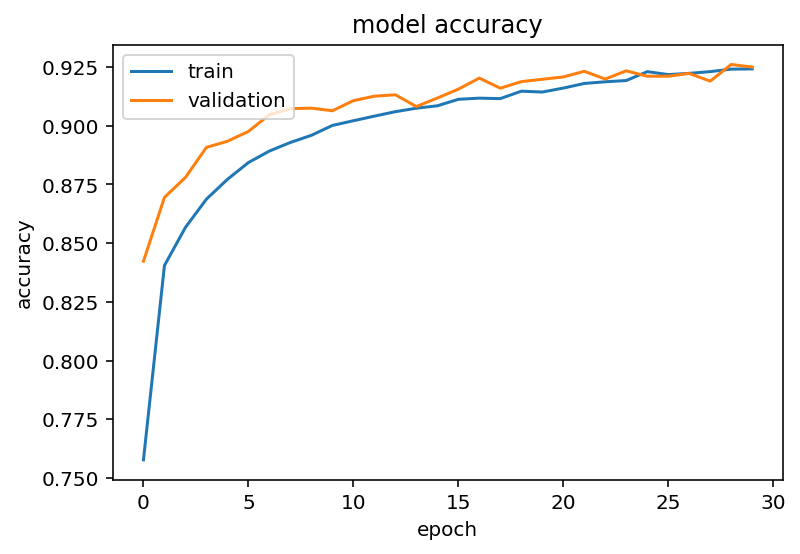

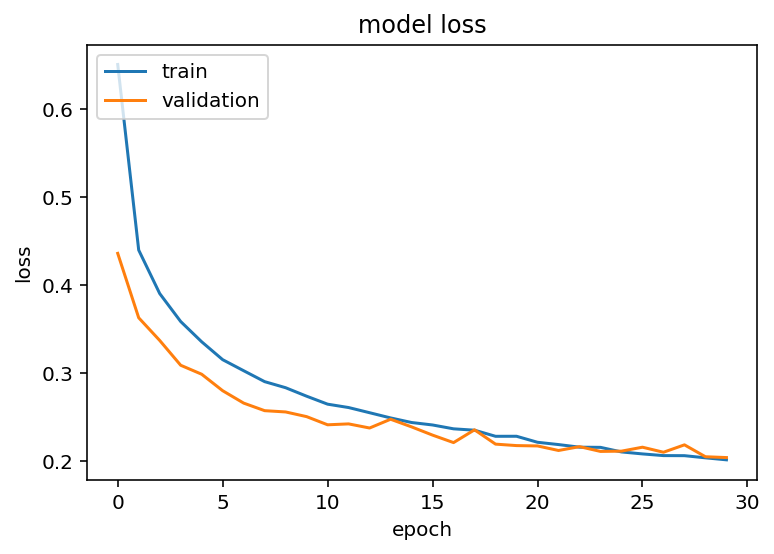

In [28]:
#funções para visulização do historial de aprendizagem
def print_history_accuracy(history):
    #print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

def print_history_loss(history):
    #print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

print_history_accuracy(history)
print_history_loss(history)

X_test: (10000, 28, 28, 1)
y_test: (10000, 10)
Imagem: (28, 28, 1)


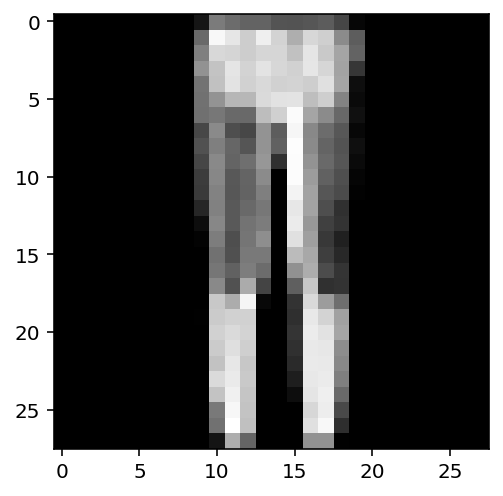

label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
antes do aumento de mais uma dimensão: (28, 28, 1)
depois do aumento de mais uma dimensão: (1, 28, 28, 1)
previsão: [[6.1327457e-11 1.0000000e+00 1.5209337e-12 1.2324318e-09 1.7270059e-10
  3.1997278e-17 1.0099509e-10 4.3949988e-18 1.5027521e-13 1.3531308e-16]]
Classe prevista: [1]


In [30]:
# Visualizar imagem, label e correspondente previsão
def visualize_previsao(x_test, y_test, img_a_mostrar):
    print("X_test:",x_test.shape)
    print("y_test:",y_test.shape)
    print("Imagem:",x_test[img_a_mostrar].shape)
    plt.imshow(x_test[img_a_mostrar,:,:,0], cmap='gray')
    plt.show()
    print("label:",y_test[img_a_mostrar])
    print("antes do aumento de mais uma dimensão:",x_test[img_a_mostrar].shape)
    imagem_tensor = np.expand_dims(x_test[img_a_mostrar], axis=0)
    print("depois do aumento de mais uma dimensão:",imagem_tensor.shape)
    print("previsão:",model.predict(imagem_tensor))
    classes = model.predict_classes(imagem_tensor)
    print('Classe prevista:',classes)
    return imagem_tensor

imagem_tensor = visualize_previsao(X_test, y_test, 3)

In [31]:
#Vamos buscar os outputs das primeiras 5 (plus) camadas da rede ou 12 para a plus_plus
camadas_outputs = []
for layer in model.layers[:5]:
    print(layer.output.shape)
    camadas_outputs.append(layer.output)

# e depois criamos um modelo que retorna estes outputs dado os inputs do modelo
activation_model = models.Model(inputs=model.input, outputs=camadas_outputs) 

(None, 28, 28, 32)
(None, 14, 14, 32)
(None, 14, 14, 32)
(None, 14, 14, 64)
(None, 7, 7, 64)


In [0]:
activations = activation_model.predict(imagem_tensor) 
# Retorna uma lista com dois Numpy arrays: um array por camada de ativação

Por exemplo esta é a ativação da primeira camada convolucional da imagem de input:

In [33]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 28, 28, 32)


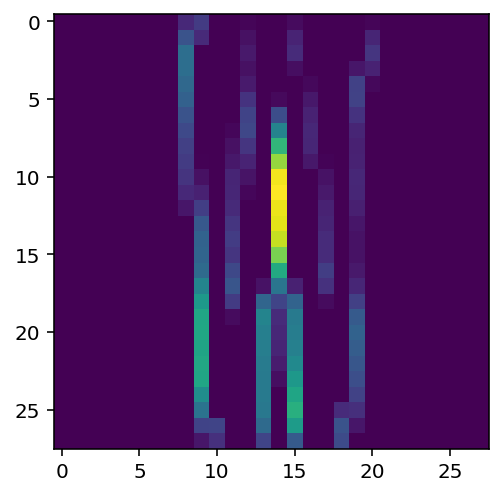

In [39]:
plt.imshow(first_layer_activation[0, :, :,9], cmap='viridis')
plt.show()

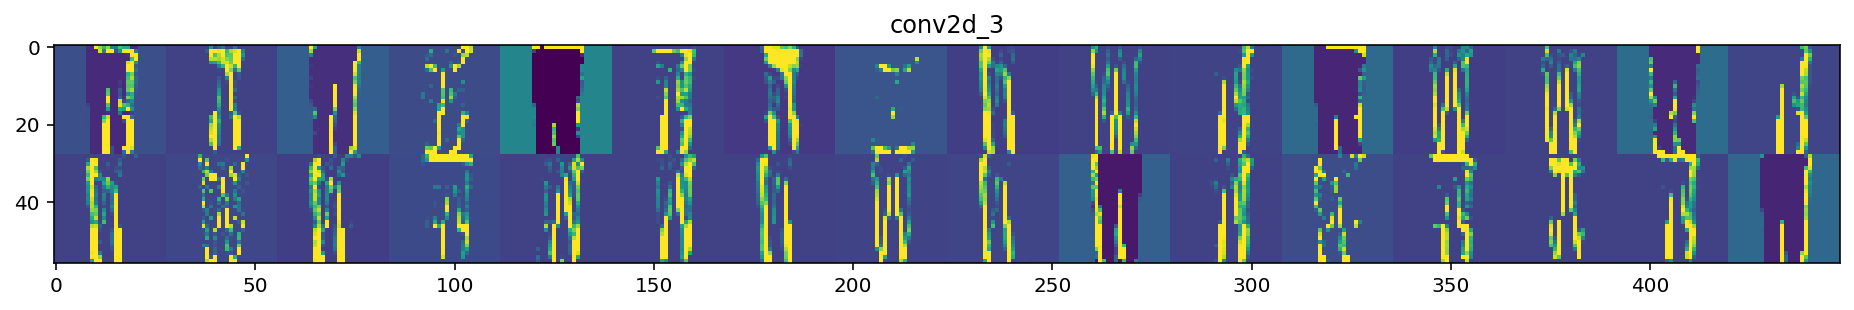

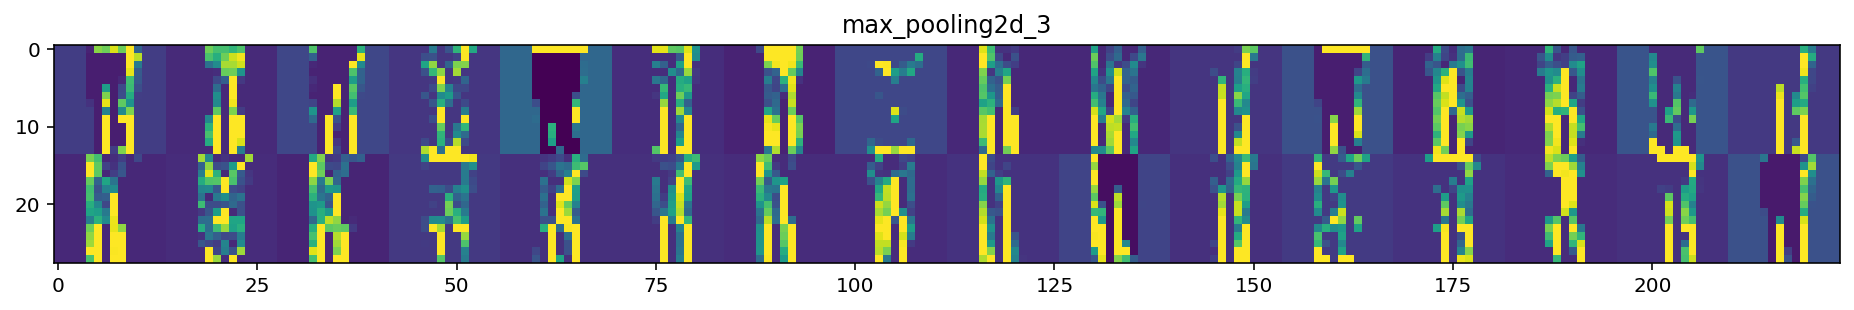

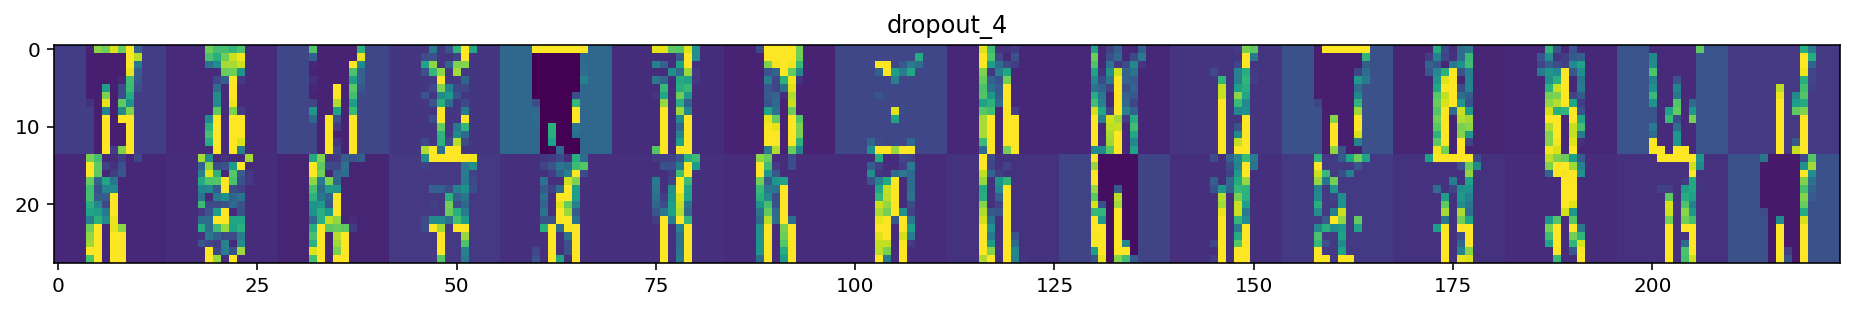

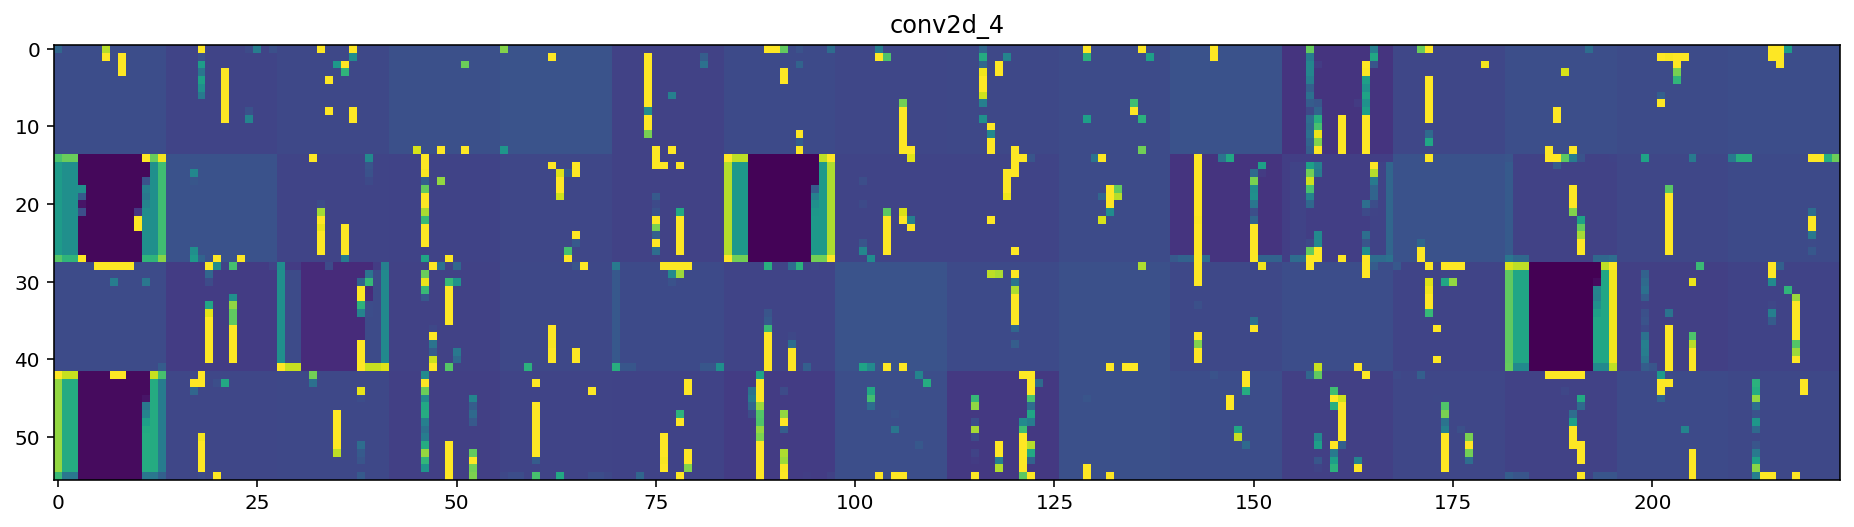

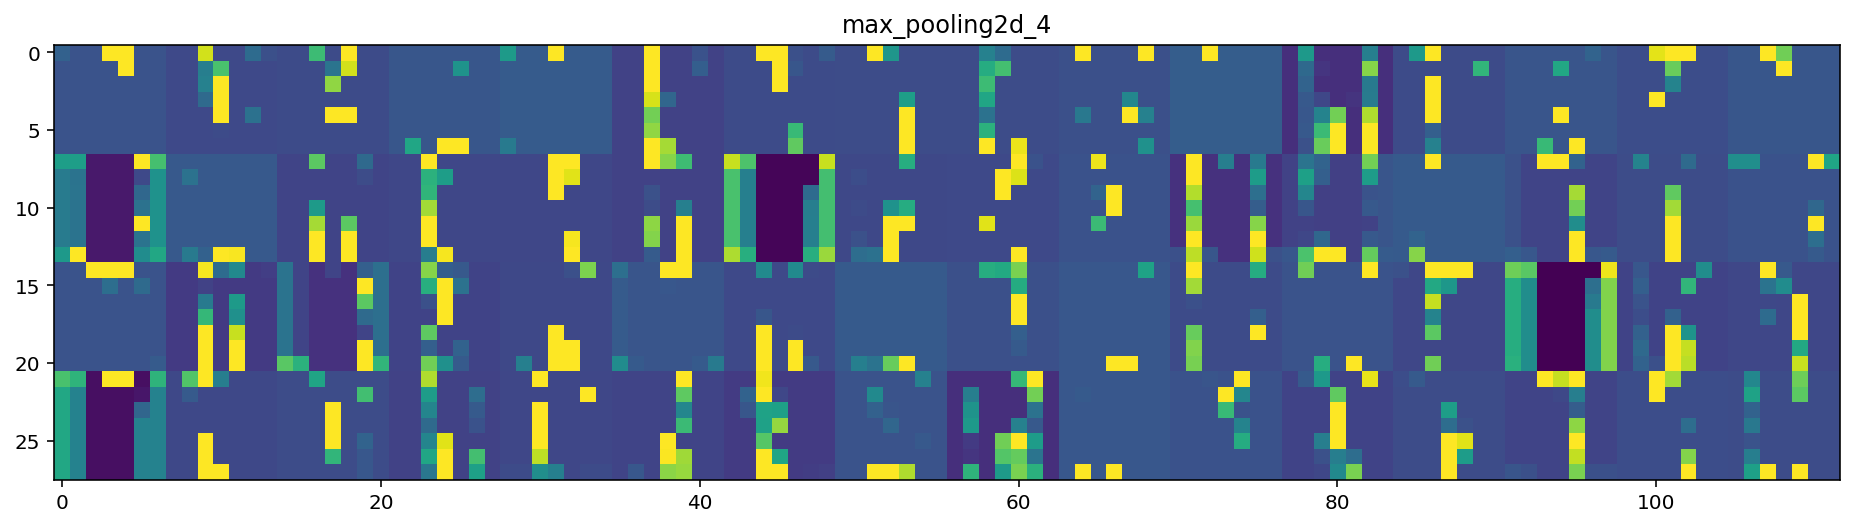

In [35]:
layer_names = []
for layer in model.layers[:5]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = (n_features // images_per_row) # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')